In [2670]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Population and Job forecasting </div>

<div class="usecase-authors"><b>Authored by: Rhutuvaruni Kharade and Tharusha Chao</div>

<div class="usecase-duration"><b>Duration:</b> 100 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, PowerBI, Tableau</div>
</div>

<div class="usecase-section-header">Scenario</div>

<b>As a citizen and a job seeker, I want to find a job in the field that currently has a lot of demand in this area. </b>
Job seekers are often worried about which jobs are in high demand or in low demand? Which industry will have higher number of jobs in future ? Which areas have highest numbers of jobs based on a particular industry ? Its important for them to know which jobs they should study for and which city has highest concentration of such jobs so they can plan their living and stay in such areas. By understanding the number of jobs based on a cities, job seekers can ensure that they can get a job or live in close vicinity of that job if they live in a particular areas. 

<b>As a business owner I want to establish my business where there is a high demand for my service. I want to make sure that the city I am planning to establish my business in has a higher population so I can attract more customers and potential candidates to work for my company. </b>
Business owners need to know in which city they should establish their company in. This is based on the population of the area. Number of people living in a particular area can motivate business owners to have their business in such locations. This will also attract many job seekers in these places which will help the businesses find the right candidates (employees) to work for them. 



<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will - 
- Learn how to make open the data in the form of pandas dataframe and save it for futher use.
- Have learned how to clean, transform, analyze, visualize data and report outcomes (findings) effectively.
- Use the data to create effective visualization like scatterplots, heatmaps, histograms, etc to aid an understanding of the data to technical and non-technical readers
- using dashboards for effective story telling to both techical and non-technical audiences. 
- Using version control tools to collaborate and contribute to the project//


<div class="usecase-section-header">Introduction</div>

This project focuses on finding the relationship between jobs and population. Jobs in different industry impact the population in the area. This project will look at this impact and will also give reader a brief idea about how population changes with respect to the number of jobs in a particular area. The data is sourced from City of Melbourne Open Data which is open source and will be used throughout this project. The dataset will be cleaned, transformed, analyzed, visualized and finally relevant insights will be reported and documented. These findings will help stakeholders, policy makers and other readers for futher decision making.  


<div class="usecase-section-header">Datasets Used </div>

1 : city-of-melbourne-jobs-forecasts-by-small-area-2020-2040

2 : city-of-melbourne-population-forecasts-by-small-area-2020-2040

<div class="usecase-section-header">Learning Opportunities</div>

ADD

<div class="usecase-section-header">Importing libraries </div>

In [2671]:
# importing libraries 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import requests
import os 
import matplotlib.pyplot as plt 
#import missingno as msno



<div class="usecase-section-header">Connecting to Dataset and Testing </div>

In [2672]:
#job = pd.read_csv("city-of-melbourne-jobs-forecasts-by-small-area-2020-2040.csv")
job_data = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-of-melbourne-jobs-forecasts-by-small-area-2020-2040/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")
job = job_data.copy()

In [2673]:
job.head()

,Geography,Year,Category,Industry Space Use,Value
0,City of Melbourne,2023,Jobs by industry,Accommodation,10286
1,City of Melbourne,2026,Jobs by industry,Accommodation,11631
2,City of Melbourne,2032,Jobs by industry,Accommodation,13207
3,City of Melbourne,2034,Jobs by industry,Accommodation,13420
4,City of Melbourne,2035,Jobs by industry,Accommodation,13529


In [2674]:
# to get a basic understanding of variables and null values
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9114 entries, 0 to 9113
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Geography           9114 non-null   object
 1   Year                9114 non-null   int64 
 2   Category            9114 non-null   object
 3   Industry Space Use  9114 non-null   object
 4   Value               9114 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 356.1+ KB


In [2675]:
# To see total numbers of rows and columns 
job.shape

(9114, 5)

In [2676]:
# Renaming columns for ease, making them all lowercase. 
job = job.rename(columns = {"Geography":"city", "Year":"year", "Category":"category", "Industry Space Use": "industry", "Value": "value"} )

In [2677]:
# In geography columns, to see which unique location it consists of
job.city.unique()

array(['City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne',
       'Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)',
       'North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra',
       'Southbank', 'West Melbourne (Industrial)',
       'West Melbourne (Residential)'], dtype=object)

In [2678]:
# to check unique years this data is from
job.year.unique()

array([2023, 2026, 2032, 2034, 2035, 2021, 2025, 2037, 2040, 2027, 2028,
       2036, 2041, 2029, 2031, 2038, 2024, 2030, 2039, 2022, 2033],
      dtype=int64)

In [2679]:
# to understand uniqe categories in category columns 
# job.category.unique()
job

,city,year,category,industry,value
0,City of Melbourne,2023,Jobs by industry,Accommodation,10286
1,City of Melbourne,2026,Jobs by industry,Accommodation,11631
2,City of Melbourne,2032,Jobs by industry,Accommodation,13207
3,City of Melbourne,2034,Jobs by industry,Accommodation,13420
4,City of Melbourne,2035,Jobs by industry,Accommodation,13529
...,...,...,...,...,...
9109,West Melbourne (Residential),2025,Jobs by space use,Total jobs,5454
9110,West Melbourne (Residential),2026,Jobs by space use,Total jobs,5618
9111,West Melbourne (Residential),2029,Jobs by space use,Total jobs,6118
9112,West Melbourne (Residential),2033,Jobs by space use,Total jobs,6717


In [2680]:
job.industry.unique()

array(['Accommodation', 'Admin and support services',
       'Agriculture and mining', 'Arts and recreation services',
       'Business services', 'Construction', 'Education and training',
       'Other services', 'Electricity, gas, water and waste services',
       'Finance and insurance', 'Food and beverage services',
       'Health care and social assistance',
       'Information media and telecommunications', 'Manufacturing',
       'Public administration and safety', 'Real estate services',
       'Rental and hiring services', 'Retail trade',
       'Transport, postal and storage', 'Wholesale trade',
       'Accommodation - Commercial', 'Education',
       'Entertainment - Hospitality', 'Entertainment - Other', 'Health',
       'Industrial', 'Office', 'Other - Employment', 'Retail',
       'Total jobs'], dtype=object)

<div class="usecase-section-header">About Jobs Forecast Dataset. </div>

This dataset provides jobs forecasts by single year for 2021 to 2041. Prepared by SGS Economics and Planning (Jan-Jun 2022), forecasts are available for the municipality and small areas, as well as by industry and space use type. This dataset has total of 9114 rows which indicates total cases and 5 columns which indicate variables(features). The dataset contains the following variables (features): 
    <ul>
        <li> <b>city:</b> Geographical area (Melbourne LGA or small areas used for the City of Melbourne's CLUE analysis). Small areas mostly correspond to traditional suburb boundaries. This is a categorical variable of type <b>object</b>. This variable takes value from the following list of locations: <b> 'City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne','Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)','North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra','Southbank', 'West Melbourne (Industrial)','West Melbourne (Residential)'</b></li><hr>
        <li>
            <b>year:</b> This variables shows the year the job were created. This is a numerical variable of type <b>object</b>. Year is from <b>2022 to 2040</b>. </li><hr>
        <li>
            <b>category:</b> This variables shows the category of the job that was created in that particular year. This is a numerical variable of type <b>object</b>. There are two categories in this variables however we will only look at category by industry.  </li><hr>
        <li>
            <b>industry_space_use:</b> This variables shows the space used by a particular industry that was established in given year. This is a numerical variable of type <b>object</b></li><hr>
        <li>
            <b>value:</b> This variables shows the number of jobs created by a particular industry that was established in given year. This is a numerical variable of type <b>integer</b>  
        </li>
    </ul></i><hr>
</ul>
</p>

In [2681]:
#pop = pd.read_csv("city-of-melbourne-population-forecasts-by-small-area-2020-2040.csv")
pop = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-of-melbourne-population-forecasts-by-small-area-2020-2040/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C")
# pop          

In [2682]:
pop.head()

,Geography,Year,Gender,Age,Value
0,City of Melbourne,2021,Female,Age 0-4,1943.0
1,City of Melbourne,2023,Female,Age 0-4,2477.0
2,City of Melbourne,2026,Female,Age 0-4,3595.0
3,City of Melbourne,2028,Female,Age 0-4,4083.0
4,City of Melbourne,2034,Female,Age 0-4,5242.0


In [2683]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Geography  17052 non-null  object 
 1   Year       17052 non-null  int64  
 2   Gender     17052 non-null  object 
 3   Age        17052 non-null  object 
 4   Value      16989 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 666.2+ KB


In [2684]:
pop.shape

(17052, 5)

In [2685]:
# Renaming columns for ease, making them all lowercase. 
pop = pop.rename(columns = {"Geography":"city", "Year":"year", "Gender":"gender", "Age": "age", "Value": "value"} )

In [2686]:
pop.city.unique()

array(['City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne',
       'Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)',
       'North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra',
       'Southbank', 'West Melbourne (Industrial)',
       'West Melbourne (Residential)'], dtype=object)

In [2687]:
pop.gender.unique()

array(['Female', 'Male', 'Total', 'Not applicable'], dtype=object)

In [2688]:
pop.age.unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85+', 'Average age',
       'Total population'], dtype=object)

In [2689]:
pop.year.unique()

array([2021, 2023, 2026, 2028, 2034, 2037, 2038, 2024, 2025, 2040, 2031,
       2033, 2022, 2032, 2036, 2041, 2027, 2029, 2039, 2035, 2030],
      dtype=int64)

In [2690]:
pop

,city,year,gender,age,value
0,City of Melbourne,2021,Female,Age 0-4,1943.0
1,City of Melbourne,2023,Female,Age 0-4,2477.0
2,City of Melbourne,2026,Female,Age 0-4,3595.0
3,City of Melbourne,2028,Female,Age 0-4,4083.0
4,City of Melbourne,2034,Female,Age 0-4,5242.0
...,...,...,...,...,...
17047,West Melbourne (Residential),2029,Not applicable,Total population,11673.0
17048,West Melbourne (Residential),2032,Not applicable,Total population,13191.0
17049,West Melbourne (Residential),2035,Not applicable,Total population,14820.0
17050,West Melbourne (Residential),2039,Not applicable,Total population,14794.0


<div class="usecase-section-header">About Population Forecast Dataset. </div>

This dataset provides Population forecasts by single year for 2021 to 2041. Prepared by SGS Economics and Planning (Jan-Jun 2022), forecasts are available for the municipality and small areas, as well as by industry and space use type. This dataset has total of 17052 rows which indicates total cases and 5 columns which indicate variables(features). The dataset contains the following variables (features): 
    <ul>
        <li> <b>city:</b> Geographical area (Melbourne LGA or small areas used for the City of Melbourne's CLUE analysis). Small areas mostly correspond to traditional suburb boundaries. This is a categorical variable of type <b>object</b>. This variable takes value from the following list of locations: <b> 'City of Melbourne', 'Carlton', 'Docklands', 'East Melbourne','Kensington', 'Melbourne (CBD)', 'Melbourne (Remainder)','North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra','Southbank', 'West Melbourne (Industrial)','West Melbourne (Residential)'</b></li><hr>
        <li>
            <b>year:</b> This variables shows the year the job were created. This is a numerical variable of type <b>integer</b>. Year is from <b>2022 to 2040</b>. </li><hr>
        <li>
            <b>gender:</b> This variables shows the gender of the person who is a part of the overall population. Gender is divided into four categories: Female, Male, Total and not applicable. This is a categorical nominal variable with type <b>object</b>  </li><hr>
        <li>
            <b>age:</b> This variables shows the age of a person who is a part of the population in this study. This is a numerical variable of type <b>object</b></li><hr>
        <li>
            <b>value:</b> This variables shows the population of the area for a given year. This is a numerical variable of type <b>float</b>  
        </li>
    </ul></i><hr>
</ul>
</p>

<div class="usecase-section-header">Checking and Handling missing values. </div>

<b>For population dataset</b>

In [2691]:
# To check if there is any missing values in any columns 
pop.isnull().any()

city      False
year      False
gender    False
age       False
value      True
dtype: bool

In [2692]:
# There are no null values in job dataset. However there is null (missing) values in population dataset in value column. 
# Lets find out how many null values are there in value column
print(pop.value.isnull().sum())


# Write more on why you chose to drop rows 

63


In [2693]:
# pop

In [2694]:
pop = pop.dropna(axis= "rows")

In [2695]:
pop.isnull().any()

city      False
year      False
gender    False
age       False
value     False
dtype: bool

<b>All missing values in "value" column of population dataset have been removed.  </b>

In [2696]:
# Choose all data where the gender is not applicable
pop = pop.set_index("gender")
other_pop = pop.loc[["Total", "Not applicable"],:]
other_pop                                         # saving total and not applicable data into differnet variable for further use. 
pop = pop.loc[["Female", "Male"],:]               # seperating male and female gender from the whole dataset
pop.reset_index(inplace=True)

In [2697]:
pop       # df where gender = ['Male', 'Female']

,gender,city,year,age,value
0,Female,City of Melbourne,2021,Age 0-4,1943.0
1,Female,City of Melbourne,2023,Age 0-4,2477.0
2,Female,City of Melbourne,2026,Age 0-4,3595.0
3,Female,City of Melbourne,2028,Age 0-4,4083.0
4,Female,City of Melbourne,2034,Age 0-4,5242.0
...,...,...,...,...,...
11125,Male,West Melbourne (Residential),2024,Average age,31.0
11126,Male,West Melbourne (Residential),2026,Average age,32.0
11127,Male,West Melbourne (Residential),2027,Average age,32.0
11128,Male,West Melbourne (Residential),2037,Average age,33.0


In [2698]:
other_pop    # df where all values from gender = ['total', 'not applicable']
other_pop.reset_index(drop=True)
other_pop

,city,year,age,value
gender,,,,
Total,City of Melbourne,2021,Age 0-4,4051.0
Total,City of Melbourne,2021,Age 20-24,33134.0
Total,City of Melbourne,2021,Age 30-34,21485.0
Total,City of Melbourne,2021,Age 50-54,4939.0
Total,City of Melbourne,2021,Age 65-69,3698.0
...,...,...,...,...
Not applicable,West Melbourne (Residential),2029,Total population,11673.0
Not applicable,West Melbourne (Residential),2032,Total population,13191.0
Not applicable,West Melbourne (Residential),2035,Total population,14820.0


<b>The population dataset now only contains data where the gender is either female or male. Another dataframe has been created to save the data from gender whose value was "Not applicable" and "Total" for futher analysis. </b>

In [2699]:
job.isnull().any()

city        False
year        False
category    False
industry    False
value       False
dtype: bool

In [2700]:
job.head(5)

,city,year,category,industry,value
0,City of Melbourne,2023,Jobs by industry,Accommodation,10286
1,City of Melbourne,2026,Jobs by industry,Accommodation,11631
2,City of Melbourne,2032,Jobs by industry,Accommodation,13207
3,City of Melbourne,2034,Jobs by industry,Accommodation,13420
4,City of Melbourne,2035,Jobs by industry,Accommodation,13529


<b>There are no missing values in job dataset hence we do not need to perfrom any operations to remove null or missing values. However the industry_space_use column has values where the industry is "Total jobs" which is not accurate so we will remove the rows where the column has such values and reserve it in a different variable for later analysis. </b>

In [2701]:
total_job_by_ind_space_use = job.set_index("industry").loc[['Total jobs'], : ]
job = job.set_index("industry").loc[['Accommodation', 'Admin and support services',
       'Agriculture and mining', 'Arts and recreation services',
       'Business services', 'Construction', 'Education and training',
       'Other services', 'Electricity, gas, water and waste services',
       'Finance and insurance', 'Food and beverage services',
       'Health care and social assistance',
       'Information media and telecommunications', 'Manufacturing',
       'Public administration and safety', 'Real estate services',
       'Rental and hiring services', 'Retail trade',
       'Transport, postal and storage', 'Wholesale trade',
       'Accommodation - Commercial', 'Education',
       'Entertainment - Hospitality', 'Entertainment - Other', 'Health',
       'Industrial', 'Office', 'Other - Employment', 'Retail'],:]
job.head(5)

,city,year,category,value
industry,,,,
Accommodation,City of Melbourne,2023,Jobs by industry,10286
Accommodation,City of Melbourne,2026,Jobs by industry,11631
Accommodation,City of Melbourne,2032,Jobs by industry,13207
Accommodation,City of Melbourne,2034,Jobs by industry,13420
Accommodation,City of Melbourne,2035,Jobs by industry,13529


In [2702]:
total_job_by_ind_space_use.head(5)

,city,year,category,value
industry,,,,
Total jobs,City of Melbourne,2022,Jobs by industry,473514
Total jobs,City of Melbourne,2023,Jobs by industry,483587
Total jobs,City of Melbourne,2026,Jobs by industry,519577
Total jobs,City of Melbourne,2027,Jobs by industry,530590
Total jobs,City of Melbourne,2030,Jobs by industry,563548


<b>Now we only have job data where each industry belongs to a speceific category and not "Total jobs" category. Howevrer, the data from "total jobs" category is saved as dataframe for futher analysis. </b>

In [2703]:
job= job.reset_index()

In [2704]:
job.shape

(8526, 5)

In [2705]:
pop.shape

(11130, 5)

<div class="usecase-section-header">Exploratory Data Analysis on Job Dataset. </div>

In [2706]:
# changing data types of the variables if they are not accurate 
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   industry  8526 non-null   object
 1   city      8526 non-null   object
 2   year      8526 non-null   int64 
 3   category  8526 non-null   object
 4   value     8526 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 333.2+ KB


In [2707]:
job.head(5)

,industry,city,year,category,value
0,Accommodation,City of Melbourne,2023,Jobs by industry,10286
1,Accommodation,City of Melbourne,2026,Jobs by industry,11631
2,Accommodation,City of Melbourne,2032,Jobs by industry,13207
3,Accommodation,City of Melbourne,2034,Jobs by industry,13420
4,Accommodation,City of Melbourne,2035,Jobs by industry,13529


Now we will have a look at the outliers an overall distribution of the industries and the jobs created by those industries (value)

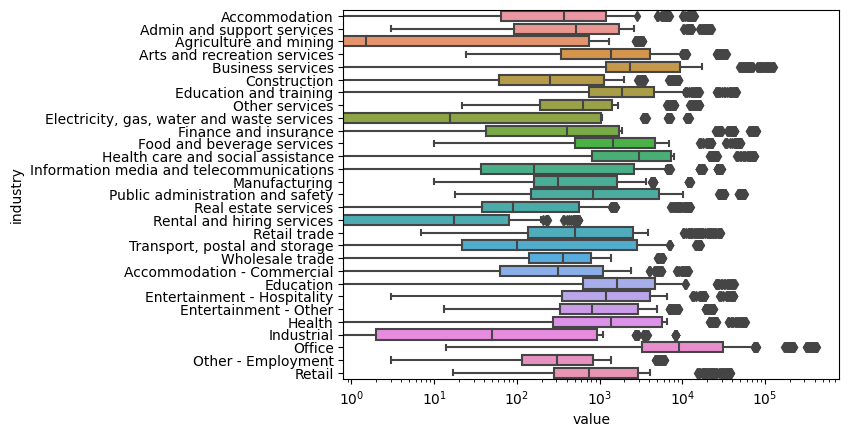

<Figure size 10000x10000 with 0 Axes>

In [2708]:
sns.boxplot(x=job.value, y=job.industry, data=job )
plt.xscale('log')
plt.figure(figsize=(100,100))
plt.show()

# job.describe()


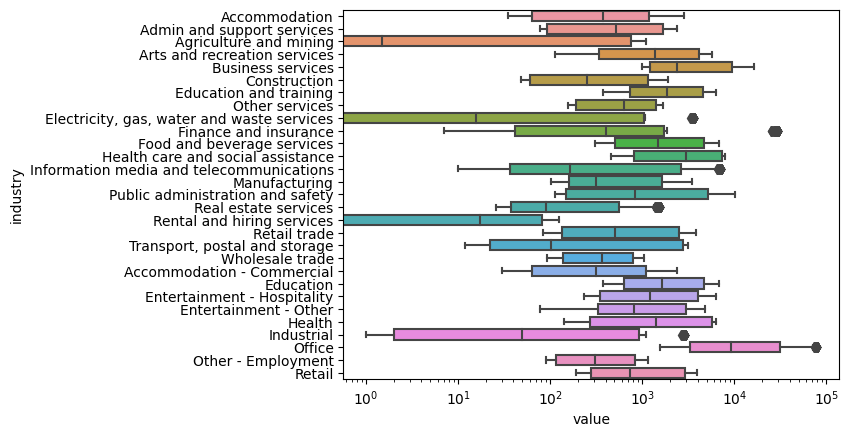

<Figure size 10000x10000 with 0 Axes>

In [2709]:
# HANDLING OUTLIERS WITH PERCENTILE METHOD (WINSORIZATION)
for ind in ind_list:
    data=job.loc[job.industry.isin([ind])]
    upper_limit = data.value.quantile(0.85)  # tried 95 percentile but didnt remove many outliers so 85
    lower_limit = data.value.quantile(0.15)
    
    data[(data.value <= upper_limit) & (data.value >= lower_limit)]
    data_1= data.copy()
    data_1.value = np.where(data_1.value >= upper_limit,upper_limit, np.where(data_1.value <= lower_limit,lower_limit, data_1.value))
    job.loc[job.industry.isin([ind])] = data_1
    
sns.boxplot(x="value", y="industry", data=job )
plt.xscale('log')
plt.figure(figsize=(100,100))
plt.show()

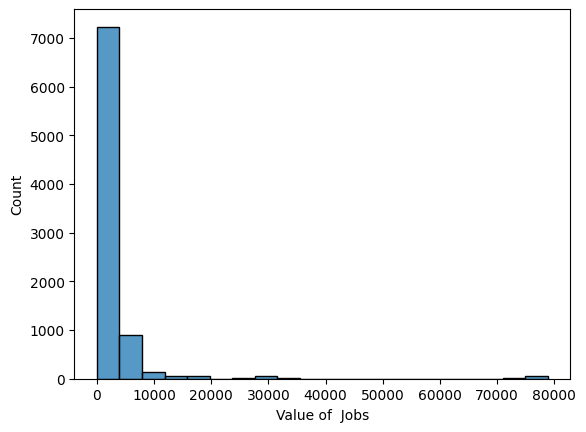

<Figure size 1000x1000 with 0 Axes>

In [2710]:
# Hisotgram of jobs with 20 bins 
sns.histplot(job.value,bins=20)
plt.xlabel("Value of  Jobs")
plt.figure(figsize=(10,10))
plt.show()

<Axes: xlabel='value', ylabel='Count'>

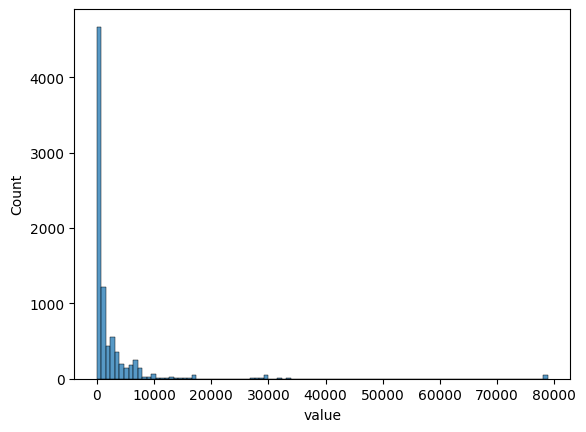

In [2711]:
# increasing bin size to see any major change 
sns.histplot(job.value, bins=100)

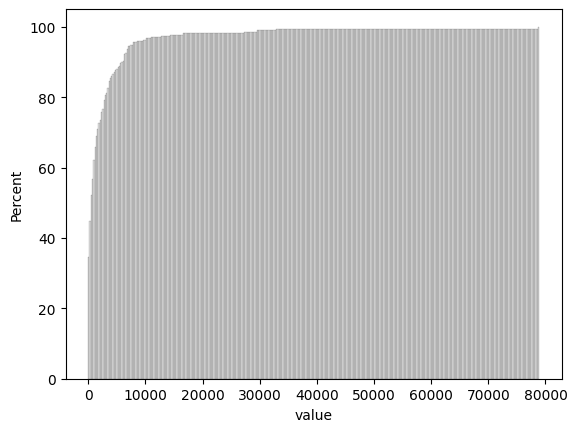

In [2712]:
# Cumulative Counts and Empirical Cumulatie ditribution Function 
sns.histplot(job.value,stat="percent", cumulative=True, color="lightgray")
plt.show()

In [2713]:
# data by industry 
# all indsutries name
data = (job
        .loc[:, ["industry", "year", "value","city"]]
        .set_index("industry")
        .sort_values("year")
        .reset_index()

       )  # selecting data based on condition. 
data.head(5)
    

,industry,year,value,city
0,Office,2021,78886.10,Melbourne (CBD)
1,Health,2021,308.00,Kensington
2,Retail trade,2021,83.00,West Melbourne (Industrial)
3,Admin and support services,2021,2372.85,City of Melbourne
4,Education,2021,370.90,East Melbourne


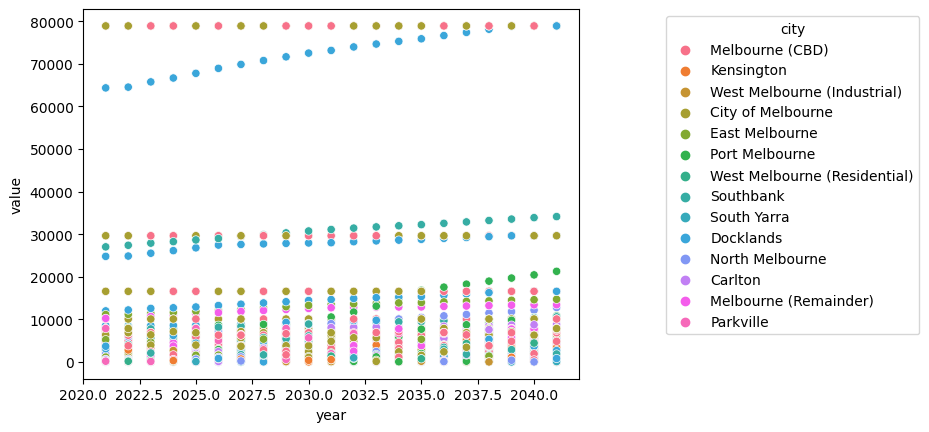

In [2714]:
# legend and colours  settings
# This is just to show users the legend based on city. 
p = sns.scatterplot(data=data,x="year", y="value", hue="city", legend=True )
sns.move_legend(p, "upper right", bbox_to_anchor=(1.7, 1))

# City of Melbourne and Mebourne CSB will see the sharpest rise in jobs 


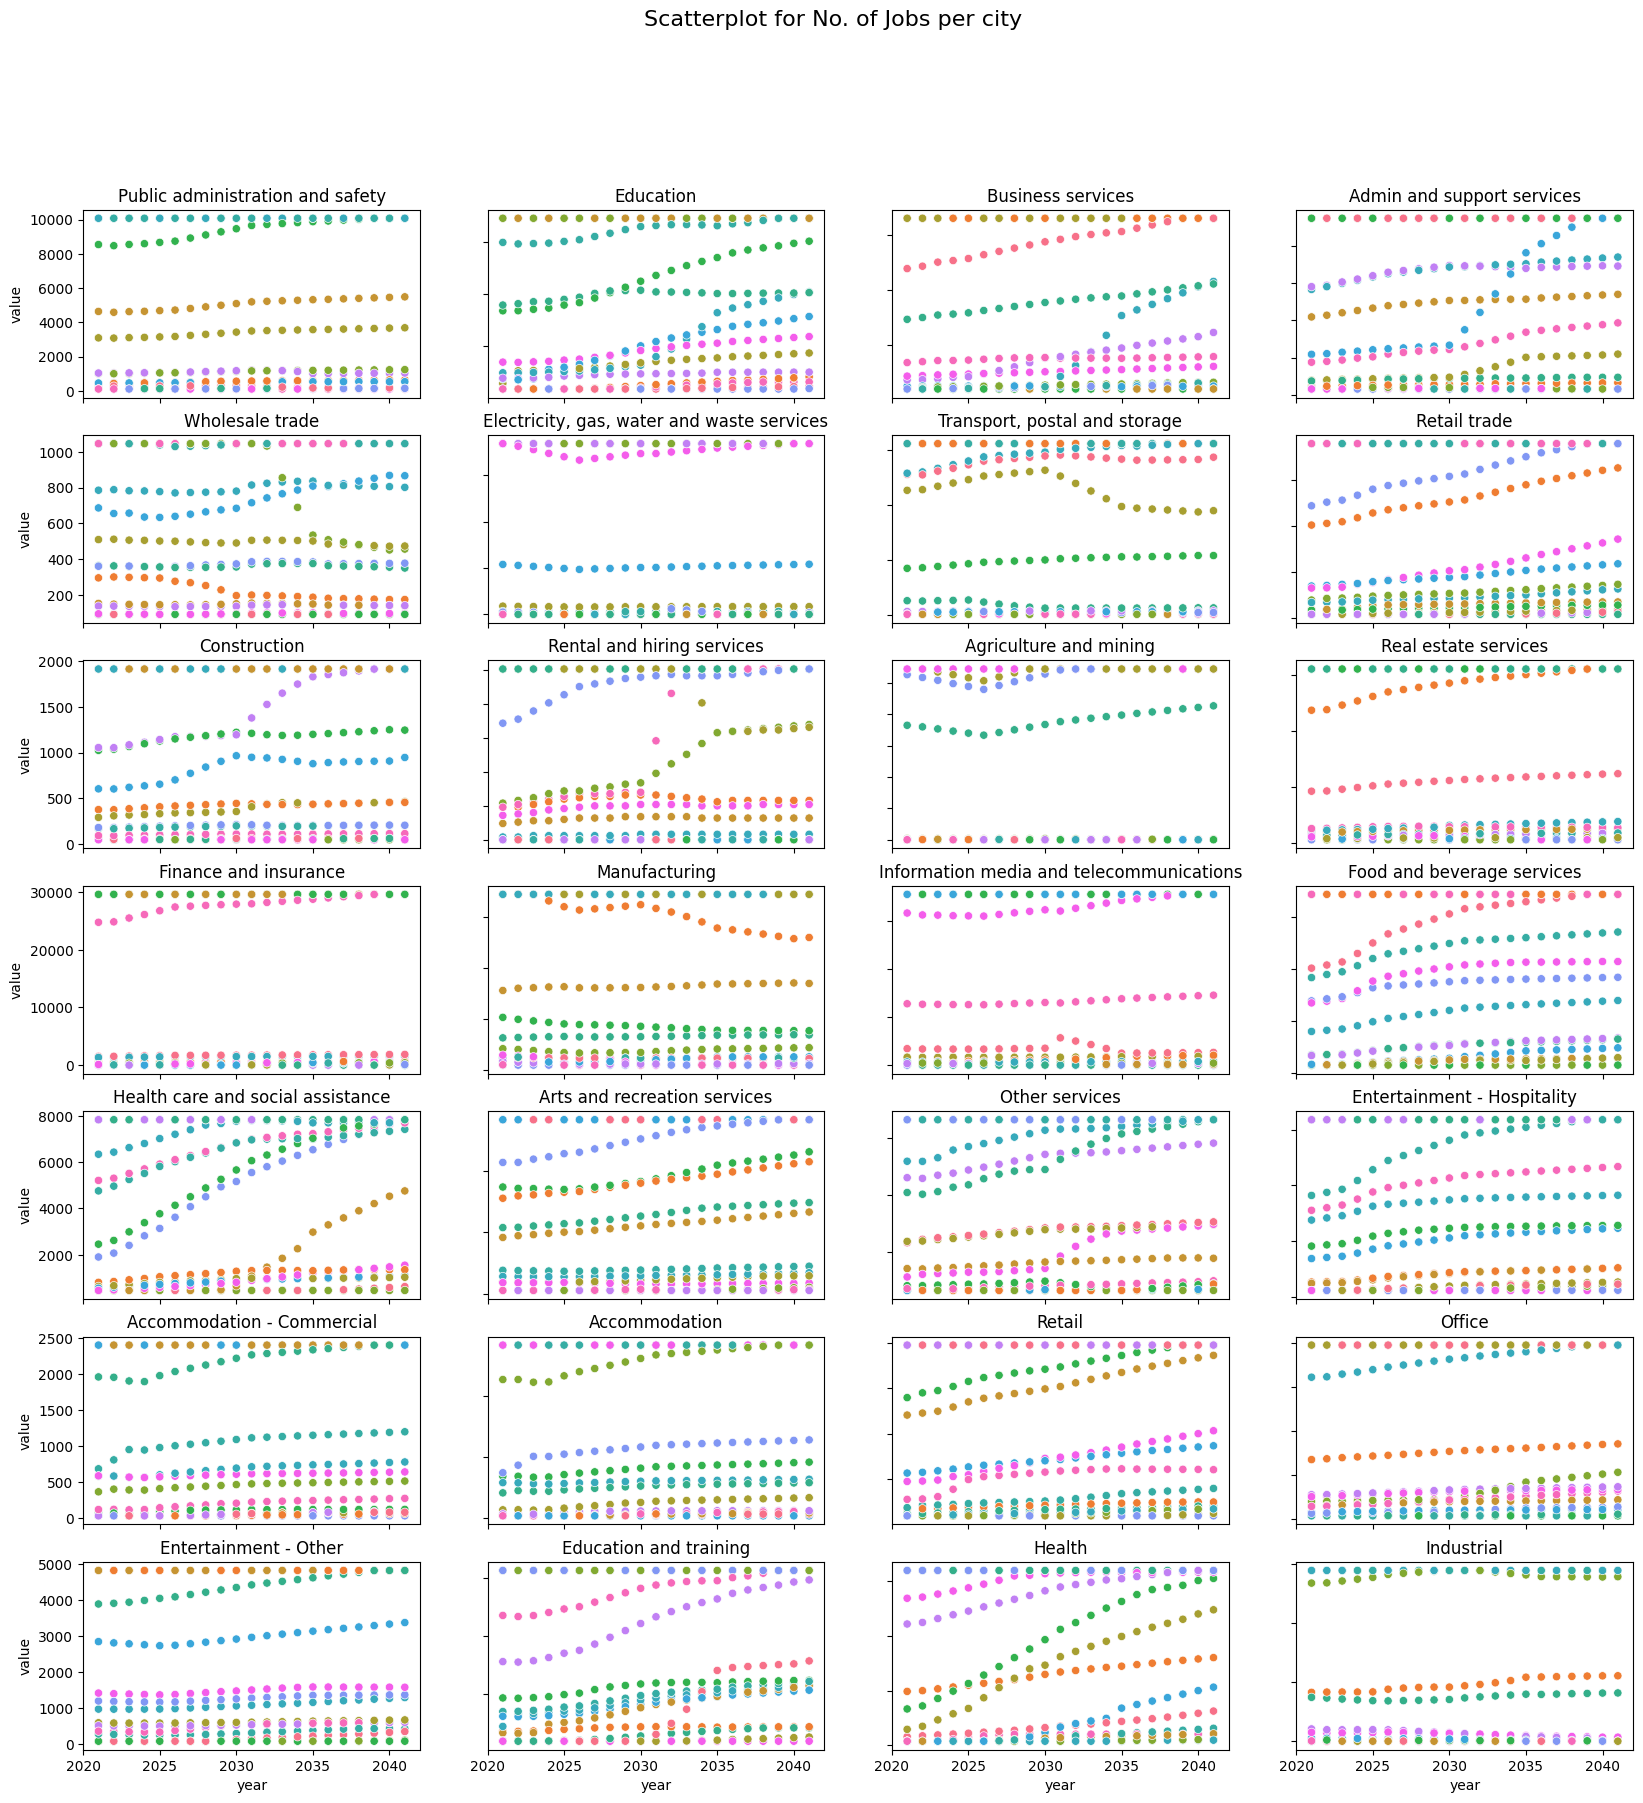

In [2715]:
# axis code for subplot location 
fig, axs = plt.subplots(7, 4)  # sharex="all",sharey="all" removed
fig.suptitle('Scatterplot for No. of Jobs per city', fontsize=16)
fig.set_figwidth(20)
fig.set_figheight(20)


for ax in axs.flat:
    ax.set(xlabel='year', ylabel='value')
    # ax.set_xticklabels([])


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# code that goes through names 
# of all industries from ind_list 
# and draws scatterplots
x = 0
while x < 28:
    x = 0
    name = ind_list[x]
    for i in range(7):
        for j in range(4):        
            axs[i,j].set_title(name)
            sns.scatterplot(data=data.loc[data.industry.isin([name])],x="year", y="value", hue="city", legend=False,ax=axs[i,j])
           
            
            # print(i, j ,name)
            x+=1
            name = ind_list[x]


<div class="usecase-section-header">Insights on job dataset from the visualiztions  </div>

 <b>

The job dataset is extremely right skewed which indicates that there are more lower values than there are higher values in the dataset. This can be seen throught the histogram of the job dataset. The histogram indicates that over 7000 jobs were created where the number of jobs is between 0 to 10000.  By increasing the bin size we can see that in the histogram mos

t.
The cumulative distribution graph shows that around 90% of the jobs are between the value of 0 and 1000

0. 
The scatterplot is drawn for the change in number of job created (value) by year. This data goes from the year 2020 to 2040. The scatterplot is color coded to show the change in particular industry based on city. Each city is shown by different colour. 

From scatterplot we see the following : 
- While Public administration and safety industry will see a steady rise in jobs in most cities over the time period, Port Melbourne will see a stepeer rise in jobs from 8000 in 2020 to about 10000 by 2040. 
- For Education industry, many cities will see rapid growth in number of jobs. While most cities see steady growth, sharp rise in seen in Port Melbourne, South Yarra and Docklands where the number of jobs increase from 6000 to 8000, 1000 to 4000 and 1000 to 3000 respectively.
- A steep rise is seen in the number of jobs in Business Services industry in Melbourne (CBD), Carlton and Docklands where the number increases from 7000 to about 10000 jobs, 1000 to 3000 jobs and 1000 and 5000 jobs respectively.

- For Admin and support services industry most cities have a steady rise in jobs, while Dockland will see a steep rise in number of jobs from 2030 to 2040 where the number of jobs will increase from 2000 to 10000 jobs . 

- A steady decline of number of Wholesale trade jobs will be seen in the city of Kensington from 300 jobs to 200 jobs while a steady growth will be seen in Docklands from 700 to more than 800. Most other cities do not see any significant change in the number of jobs. 

- We dont see any significant change in the number of jobs for Electricity, gas, water and waste services industry in most cities. Most numebr of  jobs in this industry are located in Melbourne(remainder), East Melbourne and Carlton. 

- Transport, postal and storage industry will see a rise in number of jobs in most cities except City of Melbourne where the number of jobs increase to about 800 jobs from 2020 to 2030 followed by a decline from 800 jobs to only 600 jobs from 2030 to 2040. 

-  Sharp rise in number of jobs in Retail trade industry can be seenin the cities of North Melbourne, Kensington and Melbourne (Remainder) where the number of jobs increase from 700 to over 1000 jobs, 600 to over 800 jobs and 200 to over 400 jobs respectively from 2020 to 2040. 

- While there is a steady rise in number of Construction jobs in Carlton from 2020 to 2030, a sharp rise can be seen from 1200 jobs to about 1700 jobs from 2030 to 2040. For docklands there is a steep rise from 600 jobs to 1000 jobs from 2020 to 2030 and a steady growth till 2040.

- A steep rise in the number of Rental and hiring services jobs can be seen from 2030 to 2040 in city of of Melborune from 500 jobs in 2020 to around 1000 jobs by 2040. Same trend can be seen for the city of North Melbourne where the number increase from 1200 jobs to around 2000 jobs from 2020 to 2040. 

- No significant change can be seen with Agriculture and mining jobs except for cities of North Melbourne and West Melbourne( Residential ) where there is a steady rise in number of jobs. 

- Rise in real Estate  jobs in Kensington from 2020 to 2040 can be seen where the number of jobs increased from 1500 to around 2000 jobs

- The number of jobs in Finance and insurance industry will increase in  Melborune (Remainder) from 25000 jobs to around 30000 jobs.

- A sharp decline in Manufacturing jobs can be seen in the city of Kensington from 30000 jobs in 2020 to around 21000 jobs by 2040. Port Melbourne also sees a steady decline of Manufactuing jobs from 2020 to 2040. 

- No significant rise can be seen in Information media and telecommunication jobs except a few additional jbs in Melbourne (Remainder) . 

 - Most cities will see a steady rise in number of Food and beverages services jobs with a significant rise in Parkville from 20000 jobs in 2020 to around 30000 jobs by 2040. 

- A steep rise in the number of jobs in Health care and social assitance can be observed from 2020 to 2040 in the cities of Port Melbourne and North melbourne from around 2000 jobs to over 6000 jobs. For the city of West Melbourne(Indsutrial) there was a steady rise in jobs from 2020 to 2035 and a significant rise from 2035 to 2040 with number of jobs increasing from less than 2000 to more than 4000 jobs. Around 2000 jobs were added in the city of Melbourne (Remainder), Southbank and South Yarra from 2020 to 2040. 

- Steady rise can be seen in most cities for Arts and recreation services industry. Around 2000 jobs were added in Carlton f or this industry from 2020 to 2040. 

-Other services saw a rise in all cities with a significant rise of about 4000 additional jobs in Southbank area from 2020 to 2040. 

- Entertainment-Hospitality industry saw a rise in most cities with singificant changes in teh city of South Yarra from around 5000 jo bs in 2020 t-round 8000 jobs by 2040. 

-Accomodation - Commercial and Accomodation indsutries saw a steady growth in number of jobs in most cities. 

- A rapid growth in number of jobs for Retail indsutry can be seen in cities of Port Melbourne, City of Melbourne and Mebourne (remainder) with number of jobs rising from 1700 to 2500 jobs, 1500 to over 2000 jobs, 500 jobs to around 1000 jobs in the given cities respectively. 

- Office and Entertainment-Other industries have seen a steady rise in number of jobs in most cities. 

- Significant rise in number of jobs for Eduaction and training indsutry can be seen in the city fo Carlton and Parkville where the number increased from 2000 jobs to more than 4000 jobs and around 500 jobs to round 2000 jobs in the given cities respectively. 


- A rapid growth in number of jobs can be seen in Health industry in the cities of Port Melbourne and City of Melbourne where the number increased from around 1000 jobs to more than 4000 jobs and 500 jobs to around 3000 jobs in given cities respectively. Docklands has also seen a rise from just few hundreds of jobs to around 2000 jobs from 2020 to 2040. A few jobs were added in Melborune(remainder) and Carlton. 

- No significant change can be seen in the number of jobs for I
d  rial industry with a decline of jobs in few cities. 
- 


<div class="usecase-section-header">Exploratory Data Analysis on Population Dataset. </div>

In [2716]:
avg_age_df = pop[pop.age.isin(["Average age"])]
avg_age_df

,gender,city,year,age,value
1753,Female,City of Melbourne,2023,Average age,33.0
1754,Female,City of Melbourne,2028,Average age,33.0
1755,Female,City of Melbourne,2029,Average age,33.0
1756,Female,City of Melbourne,2030,Average age,33.0
1757,Female,City of Melbourne,2031,Average age,33.0
...,...,...,...,...,...
11125,Male,West Melbourne (Residential),2024,Average age,31.0
11126,Male,West Melbourne (Residential),2026,Average age,32.0
11127,Male,West Melbourne (Residential),2027,Average age,32.0
11128,Male,West Melbourne (Residential),2037,Average age,33.0


In [2717]:
pop.age.unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85+', 'Average age'], dtype=object)

In [2718]:
pop.tail(5)   # before removing averge age rows

,gender,city,year,age,value
11125,Male,West Melbourne (Residential),2024,Average age,31.0
11126,Male,West Melbourne (Residential),2026,Average age,32.0
11127,Male,West Melbourne (Residential),2027,Average age,32.0
11128,Male,West Melbourne (Residential),2037,Average age,33.0
11129,Male,West Melbourne (Residential),2038,Average age,33.0


In [2719]:
# removing the rwos where the age is avergae age
pop = pop.set_index("age")
pop = pop.drop(index=("Average age"))

In [2720]:
pop = pop.reset_index()

In [2721]:
pop.tail()   # after removing average age rows in age col

,age,gender,city,year,value
10579,Age 85+,Male,West Melbourne (Residential),2025,2.0
10580,Age 85+,Male,West Melbourne (Residential),2027,3.0
10581,Age 85+,Male,West Melbourne (Residential),2031,5.0
10582,Age 85+,Male,West Melbourne (Residential),2038,8.0
10583,Age 85+,Male,West Melbourne (Residential),2041,8.0


In [2722]:
# female data 
female_data = pop[pop["gender"]=="Female"]
female_data

,age,gender,city,year,value
0,Age 0-4,Female,City of Melbourne,2021,1943.0
1,Age 0-4,Female,City of Melbourne,2023,2477.0
2,Age 0-4,Female,City of Melbourne,2026,3595.0
3,Age 0-4,Female,City of Melbourne,2028,4083.0
4,Age 0-4,Female,City of Melbourne,2034,5242.0
...,...,...,...,...,...
5287,Age 85+,Female,West Melbourne (Residential),2027,6.0
5288,Age 85+,Female,West Melbourne (Residential),2028,6.0
5289,Age 85+,Female,West Melbourne (Residential),2032,10.0
5290,Age 85+,Female,West Melbourne (Residential),2034,12.0


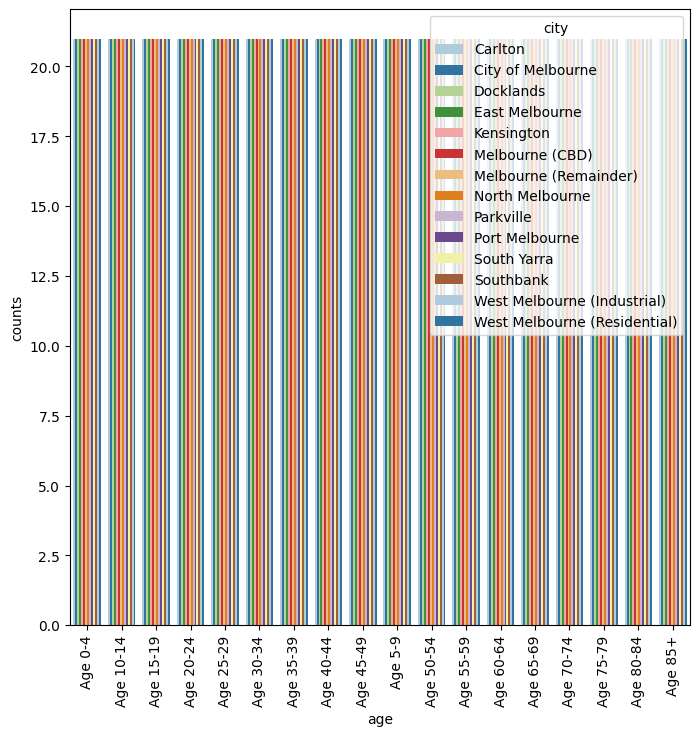

In [2723]:
age_list = ['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85+']

data = (female_data
       .groupby(["age", "city"])
       .size()
       .rename("counts")
       .reset_index())
data
plt.figure(figsize=(8,8))
sns.barplot(data= data, y="counts", x="age", palette="Paired", hue="city")
plt.xticks(rotation=90)

plt.show()


# From this data we can see that the age demographic that make up most female population in this dataset is age 25-29 making up population of 23164.00

In [2724]:
pop

,age,gender,city,year,value
0,Age 0-4,Female,City of Melbourne,2021,1943.0
1,Age 0-4,Female,City of Melbourne,2023,2477.0
2,Age 0-4,Female,City of Melbourne,2026,3595.0
3,Age 0-4,Female,City of Melbourne,2028,4083.0
4,Age 0-4,Female,City of Melbourne,2034,5242.0
...,...,...,...,...,...
10579,Age 85+,Male,West Melbourne (Residential),2025,2.0
10580,Age 85+,Male,West Melbourne (Residential),2027,3.0
10581,Age 85+,Male,West Melbourne (Residential),2031,5.0
10582,Age 85+,Male,West Melbourne (Residential),2038,8.0


In [2725]:
(pop
      .loc[:, ["gender", "value"]]
      .groupby("gender")
      .size())


# The dataset contains equal number of observations for both male and female

gender
Female    5292
Male      5292
dtype: int64

In [2726]:
(pop
.loc[:, ['age', 'city', 'gender']]
.groupby(["gender", 'age'])
.size()
.rename("counts")
.reset_index())

# Our dataset contains equal distribution of both male and female in each 
# age group 

,gender,age,counts
0,Female,Age 0-4,294
1,Female,Age 10-14,294
2,Female,Age 15-19,294
3,Female,Age 20-24,294
4,Female,Age 25-29,294
5,Female,Age 30-34,294
6,Female,Age 35-39,294
7,Female,Age 40-44,294
8,Female,Age 45-49,294
9,Female,Age 5-9,294


In [2727]:
(pop
.loc[:, ['gender', 'year', 'value','city']]
.groupby(["city", "year"])
.size()
.rename("population_count")
.reset_index)

<bound method Series.reset_index of city                          year
Carlton                       2021    36
                              2022    36
                              2023    36
                              2024    36
                              2025    36
                                      ..
West Melbourne (Residential)  2037    36
                              2038    36
                              2039    36
                              2040    36
                              2041    36
Name: population_count, Length: 294, dtype: int64>

In [2728]:
(pop
.loc[:, ['gender', 'year', 'value','city']]
.groupby(["gender", "year"])
.size()
.rename("population_count")
.reset_index)

<bound method Series.reset_index of gender  year
Female  2021    252
        2022    252
        2023    252
        2024    252
        2025    252
        2026    252
        2027    252
        2028    252
        2029    252
        2030    252
        2031    252
        2032    252
        2033    252
        2034    252
        2035    252
        2036    252
        2037    252
        2038    252
        2039    252
        2040    252
        2041    252
Male    2021    252
        2022    252
        2023    252
        2024    252
        2025    252
        2026    252
        2027    252
        2028    252
        2029    252
        2030    252
        2031    252
        2032    252
        2033    252
        2034    252
        2035    252
        2036    252
        2037    252
        2038    252
        2039    252
        2040    252
        2041    252
Name: population_count, dtype: int64>

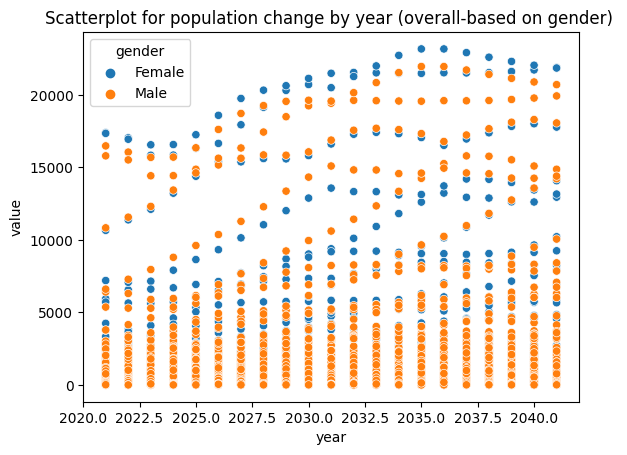

In [2729]:
sns.scatterplot(data=pop, x="year", y="value", hue="gender")
plt.title("Scatterplot for population change by year (overall-based on gender) ")
plt.show()

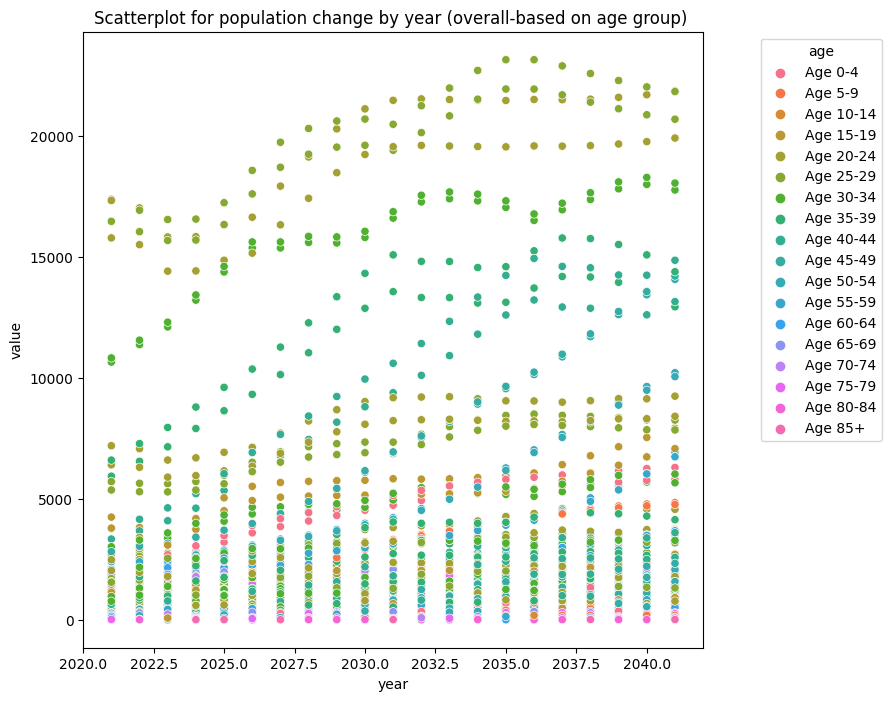

In [2730]:
plt.figure(figsize=(8,8))
p = sns.scatterplot(data=pop, x="year", y="value", hue="age")
plt.title("Scatterplot for population change by year (overall-based on age group) ")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.3, 1))

plt.show()

In [2731]:
city_names = list(pop.city.unique())
len(city_names)
city_names

['City of Melbourne',
 'Carlton',
 'Docklands',
 'East Melbourne',
 'Kensington',
 'Melbourne (CBD)',
 'Melbourne (Remainder)',
 'North Melbourne',
 'Parkville',
 'Port Melbourne',
 'South Yarra',
 'Southbank',
 'West Melbourne (Industrial)',
 'West Melbourne (Residential)']

In [2732]:
pop

,age,gender,city,year,value
0,Age 0-4,Female,City of Melbourne,2021,1943.0
1,Age 0-4,Female,City of Melbourne,2023,2477.0
2,Age 0-4,Female,City of Melbourne,2026,3595.0
3,Age 0-4,Female,City of Melbourne,2028,4083.0
4,Age 0-4,Female,City of Melbourne,2034,5242.0
...,...,...,...,...,...
10579,Age 85+,Male,West Melbourne (Residential),2025,2.0
10580,Age 85+,Male,West Melbourne (Residential),2027,3.0
10581,Age 85+,Male,West Melbourne (Residential),2031,5.0
10582,Age 85+,Male,West Melbourne (Residential),2038,8.0


IndexError: list index out of range

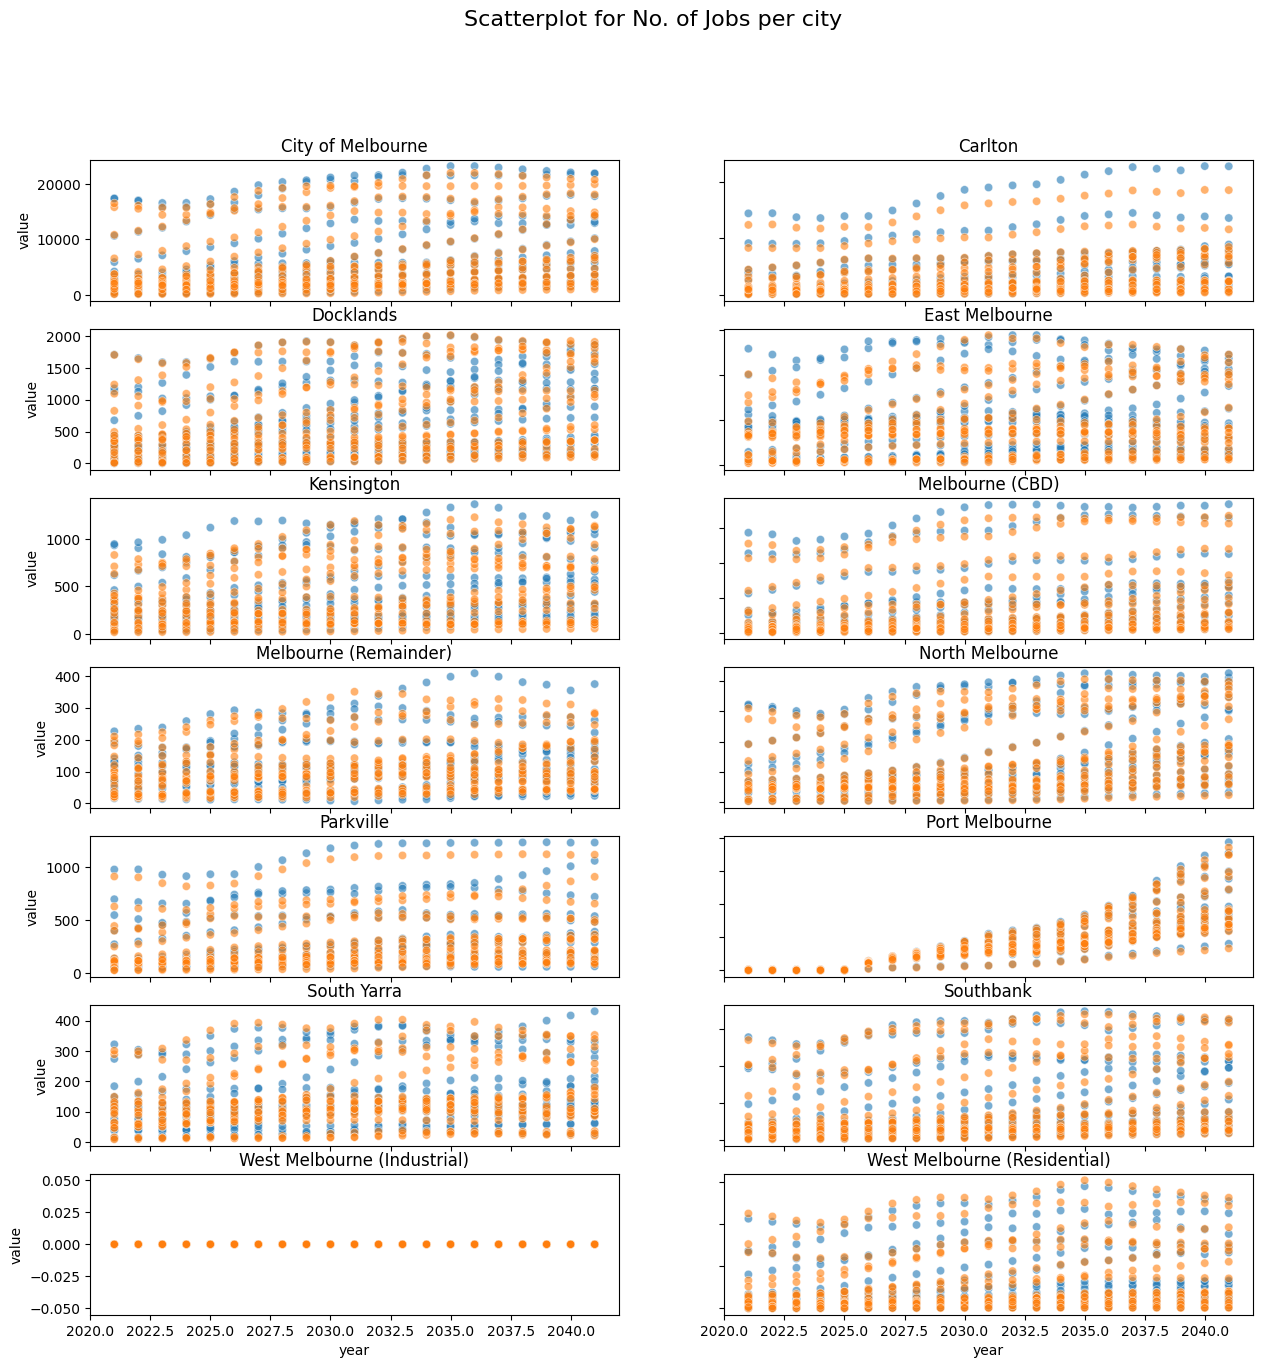

In [2733]:
# axis code for subplot location 
fig, axs = plt.subplots(7, 2)  # sharex="all",sharey="all" removed
fig.suptitle('Scatterplot for No. of Jobs per city', fontsize=16)
fig.set_figwidth(15)
fig.set_figheight(15)


for ax in axs.flat:
    ax.set(xlabel='year', ylabel='value')
    # ax.set_xticklabels([])


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# code that goes through names 
# of all industries from ind_list 
# and draws scatterplots
x = 0
while x < 14:
    x = 0
    name = city_names[x]
    for i in range(7):
        for j in range(2):        
            axs[i,j].set_title(name)
            sns.scatterplot(data=pop.loc[pop.city.isin([name])],x="year", y="value", hue="gender", legend=False,ax=axs[i,j],alpha=0.6)
           
            
            # print(i, j ,name)
            x+=1
            name = city_names[x]


<div class="usecase-section-header">References</div>
<ul>
    <li> https://pandas.pydata.org/docs/reference/api/pandas.unique.html </li>
    <li>https://note.nkmk.me/en/python-pandas-nan-extract/#:~:text=You%20can%20use%20the%20isnull,a%20missing%20value%20or%20not.&text=isnull()%20is%20an%20alias,and%20both%20are%20used%20interchangeably.</li>
    <li>https://www.kaggle.com/code/malanep/finding-and-visualizing-missing-data-in-python</li>
    <li>https://libraries.io/pypi/missingno</li>
    <li>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html</li>
    <li>https://stackoverflow.com/questions/44869327/find-index-of-all-rows-with-null-values-in-a-particular-column-in-pandas-datafra</li>
https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py

    
https://studyopedia.com/numpy/search-numpy-array-for-a-value/#:~:text=In%20a%20Numpy%20array%2C%20we,the%20specific%20element%20is%20found.&text=The%20out%20above%20displays%20%5B2,at%20index%202%20and%205.

https://saturncloud.io/blog/how-to-detect-and-exclude-outliers-in-a-pandas-dataframe/#:~:text=Outliers%20can%20be%20identified%20using,middle%2050%25%20of%20the%20data.
    
</ul>